## Logistic Regression For Binary Classification From Scratch

Classification is the process of assigning objects to predefined categories and is a fundamental task in machine learning. Various algorithms have been developed to address classification problems effectively.
In this study, we examine logistic regression, one of the most widely used classification models. We first present its application to binary classification and subsequently extend the approach to multiclass classification, where the number of classes exceeds two.

While logistic regression is readily available in Python's Scikit-Learn library, we implement it using NumPy to provide a detailed mathematical perspective on the underlying computations.

Suppose we have $N$ observations, each characterized by $m$ features $x_1, x_2, \cdots, x_m$ and a corresponding binary output $y \in \{0,1\} $.

feature 1  | feature 2  | $\cdots$    | feature m   | target
-----------|------------|-------------|-------------|-------
$x_1^{(1)}$|$x_1^{(2)}$ | $\cdots$    | $x_1^{(m)}$ | $y_1$
$x_2^{(1)}$|$x_2^{(2)}$ | $\cdots$    | $x_2^{(m)}$ | $y_2$
$x_3^{(1)}$|$x_3^{(2)}$ | $\cdots$    | $x_3^{(m)}$ | $y_3$
$\vdots$   |$\vdots$    | $\ddots$    | $\vdots$    | $\vdots$
$x_N^{(1)}$|$x_N^{(2)}$ | $\cdots$    | $x_N^{(m)}$ | $y_N$

Instead of providing predicted class id, logistic regression outputs probability which the input belongs to which class. Let's say the predicted probability is [0.3, 0.7]. That measn given instance has 30% probability to be assigned to class 0 and 70% probability for class 1. So that we can predict given instance belongs to class 1. 

To interpret the outputs as probabilities, we need a function that maps any real-valued input to the range $[0,1]$. The **sigmoid function** is well-suited for this purpose and is defined as:  

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

Since each observation consists of $ m $ features, we must first combine them into a single scalar value before applying the sigmoid function. A natural way to achieve this is through a **linear combination**, as done in linear regression:  

$$
z = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_m x_m
$$

Applying the sigmoid function to $ z $, we obtain the logistic regression model:  

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

Substituting $ z $ into the equation, we can express the logistic regression model in a single equation:  

$$
\sigma(\beta_0, \beta_1, \dots, \beta_m) = \frac{1}{1 + e^{-(\beta_0 + \beta_1x_1 + \beta_2x_2 + \cdots + \beta_mx_m)}}
$$

This formulation allows us to compute the probability of an instance belonging to a particular class, making logistic regression a fundamental model for binary classification.  

### **Defining the Loss in Logistic Regression**  

In logistic regression, our goal is to find the best parameters $ \beta_0, \beta_1, \dots, \beta_m $ that make the model's predictions as accurate as possible. But how do we measure whether a set of parameters is good or bad?  

To evaluate this, we use a **loss function**, which quantifies how far the predicted probabilities are from the actual labels. A **lower loss** means better predictions, while a **higher loss** means worse predictions.  

#### **Intuition Behind Loss**  

Let’s consider a few scenarios:  

| Target ($y$) | Probability of Class 0 | Probability of Class 1 | Loss Level | Explanation |
|--------|-----------------|----------------|------------|--------------|
| 1      | 0.1             | 0.9            | **Low Loss** | The model correctly predicts class 1 with 90% confidence. |
| 0      | 0.15            | 0.85           | **High Loss** | The model confidently predicts class 1, but the true class is 0. |
| 1      | 0.91            | 0.09           | **High Loss** | The model confidently predicts class 0, but the true class is 1. |
| 1      | 0.35            | 0.65           | **Medium Loss** | The model predicts class 1, but with lower confidence (65%). |

From these examples, we can make a few observations:  
- If the model assigns a **high probability to the correct class**, the loss is **low**.  
- If the model assigns a **high probability to the wrong class**, the loss is **high**.  
- If the model is **uncertain** (e.g., predicts 50-50), the loss is somewhere in between.  

### **A Mathematical Definition of Loss**  

To formalize this, we need a function that:  
- **Returns small values** when the prediction is correct and confident.  
- **Returns large values** when the prediction is incorrect and confident.  

A simple function that achieves this is the **log loss (cross-entropy loss)**. For a single observation $ (x, y) $, the loss is defined as:  

$$
L(y, \hat{y}) = - \left[ y \log(\hat{y}) + (1 - y) \log(1 - \hat{y}) \right]
$$

where:  
- $ y $ is the actual class label (either 0 or 1).  
- $ \hat{y} $ is the predicted probability for class 1.  

#### **Why Does This Formula Work?**  

Let’s see how this formula behaves in different scenarios:  

1. **If $ y = 1 $** (the true class is 1), the formula simplifies to:  
   $$
   L = -\log(\hat{y})
   $$
   - If $ \hat{y} $ is close to **1** (correct prediction), $ -\log(1) = 0 $ (low loss).  
   - If $ \hat{y} $ is close to **0** (wrong prediction), $ -\log(0) $ is very large (high loss).  

2. **If $ y = 0 $** (the true class is 0), the formula simplifies to:  
   $$
   L = -\log(1 - \hat{y})
   $$
   - If $ \hat{y} $ is close to **0** (correct prediction), $ -\log(1) = 0 $ (low loss).  
   - If $ \hat{y} $ is close to **1** (wrong prediction), $ -\log(0) $ is very large (high loss).  

### **Loss Function for the Entire Dataset**  

Since we need to evaluate multiple observations, we compute the **average loss** over all training examples. The **cost function (log loss)** is:  

$$
J(\beta) = -\frac{1}{N} \sum_{i=1}^{N} \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]
$$

where:  
- $ J(\beta) $ is the total cost function.  
- $ N $ is the number of training examples.  
- $ \hat{y}_i $ is the model’s predicted probability for the $ i $-th sample.  
- $ y_i $ is the actual label (0 or 1).  

This loss function is what we aim to **minimize** when training logistic regression.

### **Optimizing Logistic Regression: Gradient Descent**  

Now that we have defined the **loss function**, our next step is to **minimize** it. In other words, we need to find the **best parameters** $ \beta_0, \beta_1, \dots, \beta_m $ that result in the lowest possible loss.  

One of the most widely used optimization algorithms for this purpose is **Gradient Descent**.  

### **Why Gradient Descent?**  
Gradient Descent is an **iterative algorithm** that updates the parameters step by step in the direction that **reduces** the loss. The idea is simple:  

1. Compute how much each parameter $ \beta_j $ is contributing to the loss.  
2. Adjust $ \beta_j $ slightly in the opposite direction of the contribution to **reduce the loss**.  
3. Repeat this process until the loss is minimized (or is small enough).  

Mathematically, this means we need to compute the **partial derivatives** of the loss function with respect to each parameter $ \beta_j $.  

## **Computing the Gradient**

### **Step-by-Step Calculation of Partial Derivatives**  

We start with the **log loss function** for a single observation:

$$
L(y, \hat{y}) = - \left[ y \log(\hat{y}) + (1 - y) \log(1 - \hat{y}) \right]
$$

where:  
- $ y $ is the actual class label (either 0 or 1).  
- $ \hat{y} $ is the predicted probability of class 1, computed using the **sigmoid function**:

  $$
  \hat{y} = \sigma(z) = \frac{1}{1 + e^{-z}}
  $$

  where $ z $ is the linear combination of features:

  $$
  z = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_m x_m
  $$

#### **Step 1: Compute the Partial Derivative with Respect to $ \beta_j $**  

We need to compute:

$$
\frac{\partial L}{\partial \beta_j}
$$

Using the chain rule:

$$
\frac{\partial L}{\partial \beta_j} = \frac{\partial L}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial z} \cdot \frac{\partial z}{\partial \beta_j}
$$

Let's compute each term one by one.

#### **Step 2: Compute $ \frac{\partial L}{\partial \hat{y}} $**  

$$
L = - \left[ y \log(\hat{y}) + (1 - y) \log(1 - \hat{y}) \right]
$$

Taking the derivative with respect to $ \hat{y} $:

$$
\frac{\partial L}{\partial \hat{y}} = -\frac{y}{\hat{y}} + \frac{1 - y}{1 - \hat{y}}
$$

#### **Step 3: Compute $ \frac{\partial \hat{y}}{\partial z} $**  

We know:

$$
\hat{y} = \sigma(z) = \frac{1}{1 + e^{-z}}
$$

Taking its derivative:

$$
\frac{d\sigma}{dz} = \sigma(z) (1 - \sigma(z))
$$

Since $ \sigma(z) = \hat{y} $, we rewrite:

$$
\frac{\partial \hat{y}}{\partial z} = \hat{y} (1 - \hat{y})
$$

#### **Step 4: Compute $ \frac{\partial z}{\partial \beta_j} $**  

Since:

$$
z = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_m x_m
$$

Taking its derivative with respect to $ \beta_j $:

$$
\frac{\partial z}{\partial \beta_j} = x_j
$$

#### **Step 5: Combine the Terms**  

Now, multiplying all terms:

$$
\frac{\partial L}{\partial \beta_j} = \left( -\frac{y}{\hat{y}} + \frac{1 - y}{1 - \hat{y}} \right) \cdot \hat{y} (1 - \hat{y}) \cdot x_j
$$

Simplifying:

$$
\frac{\partial L}{\partial \beta_j} = (\hat{y} - y) x_j
$$


### **Generalizing to the Full Dataset**  

For **multiple observations**, we compute the **average** gradient over all training samples.  

If we have **N observations**, the total loss function is:

$$
J(\beta) = -\frac{1}{N} \sum_{i=1}^{N} \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]
$$

Taking the derivative:

$$
\frac{\partial J}{\partial \beta_j} = \frac{1}{N} \sum_{i=1}^{N} (\hat{y}_i - y_i) x_{ij}
$$


### **Vectorized Form of Gradient Descent**  

Instead of computing derivatives one by one, we can write everything in **matrix-vector form**, which is much more efficient for implementation.  

#### **Step 1: Express $ Z $ in Matrix Form**  

We define:  
- $ X $ as the **feature matrix** (size $ N \times (m+1) $), where each row is an observation and the first column is **1** for the bias term.
- $ \beta $ as the **parameter vector** (size $ (m+1) \times 1 $).
- $ Z $ as the **linear combination** of inputs:

  $$
  Z = X \beta
  $$

- $ \hat{Y} $ as the vector of **predicted probabilities**:

  $$
  \hat{Y} = \sigma(Z) = \frac{1}{1 + e^{-Z}}
  $$

- $ Y $ as the **actual class labels vector** (size $ N \times 1 $).

#### **Step 2: Compute the Gradient**  

$$
\frac{\partial J}{\partial \beta} = \frac{1}{N} X^T (\hat{Y} - Y)
$$

This compact equation **efficiently computes all gradients at once**.

### **Final Gradient Descent Update Rule**  

$$
\beta := \beta - \alpha \frac{1}{N} X^T (\hat{Y} - Y)
$$

where:
- $ \alpha $ is the **learning rate**.
- $ X^T (\hat{Y} - Y) $ computes the gradient for all parameters at once.

## Implementing Logistic Regression From Scratch

In [122]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

In [123]:
def sigmoid(arr):
    return 1 / (1 + np.exp(-arr))

def find_loss(logits, y):
    return -np.mean(y*np.log(logits) + (1-y)*np.log(1 - logits))

def add_one(arr):
    return np.c_[np.ones(arr.shape[0]), arr]

In [124]:
data = load_breast_cancer()
X = data.data[:,:2] # Only first 2 features
y = data.target

std_scaler = StandardScaler()
X = std_scaler.fit_transform(X)
X = add_one(X)

In [131]:
coef = np.random.randn(X.shape[1])

for i in range(1000):
    Z = X @ coef
    logits = sigmoid(Z)
    loss = find_loss(logits, y)
    grads = -1/X.shape[0] * X.T @ (logits - y)
    coef -= 0.001 * grads

print(coef)

[0.74077341 2.7658189  0.69734432]


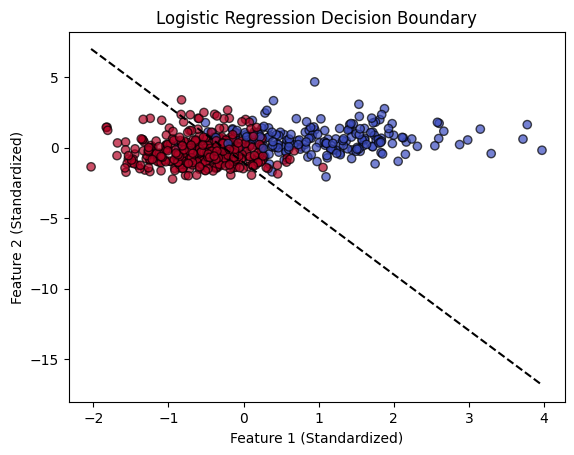

In [132]:
plt.scatter(X[:, 1], X[:, 2], c=y, cmap='coolwarm', edgecolors='k', alpha=0.7)
x_vals = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
y_vals = -(coef[0] + coef[1] * x_vals) / coef[2]
plt.plot(x_vals, y_vals, 'k--')
plt.xlabel("Feature 1 (Standardized)")
plt.ylabel("Feature 2 (Standardized)")
plt.title("Logistic Regression Decision Boundary")
plt.show()

In [96]:
from sklearn.linear_model import LogisticRegression

data = load_breast_cancer()
X = data.data[:,:2] # Only first 2 features
y = data.target

std_scaler = StandardScaler()
X = std_scaler.fit_transform(X)

log_reg = LogisticRegression(penalty=None)
log_reg.fit(X, y)

LogisticRegression(penalty=None)

In [97]:
log_reg.coef_

array([[-3.71834164, -0.93674067]])

In [98]:
log_reg.intercept_

array([0.70759235])